<a href="https://colab.research.google.com/github/Gizem-kaya/Image-Processing-with-Python/blob/master/Filter_Contrast_Transformation_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.filters import gaussian
from skimage import exposure
from skimage.transform import rotate
from skimage.transform import rescale
from skimage.transform import resize
from skimage.filters import threshold_minimum
from skimage import morphology


In [ ]:
def comparison(original, title, filtered, new_title):
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8,6), sharex = True, sharey = True )

  ax1.imshow(original, cmap = plt.cm.gray)
  ax1.set_title(title)
  ax1.axis('off')

  ax2.imshow(filtered, cmap = plt.cm.gray)
  ax2.set_title(new_title)
  ax2.axis('off')

  plt.show()

# **Edge Detection**

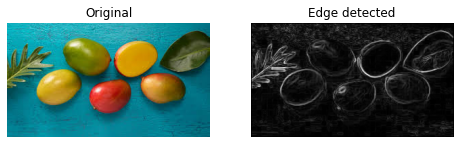

In [ ]:
image = plt.imread("edge_detection.jpg")
grayscaled = rgb2gray(image)

edge_sobel = sobel(grayscaled)

comparison(image, "Original", edge_sobel, "Edge detected")
plt.show()

 # **Blurring**

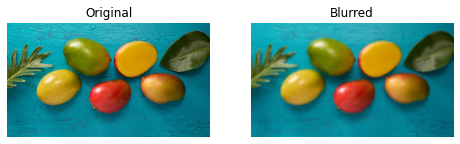

In [ ]:
gaussian_im = gaussian(image, multichannel = True)  #If the image has rgb, multichannel must be True.

comparison(image, "Original", gaussian_im, "Blurred")

# **Equalization**

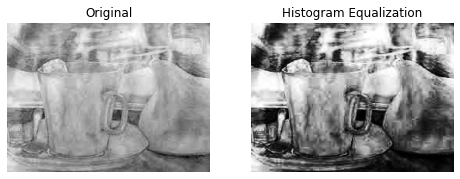

In [ ]:
faded = plt.imread("faded.jpg")

faded = rgb2gray(faded)

hist_equalized = exposure.equalize_hist(faded)

comparison(faded, "Original", hist_equalized, "Histogram Equalization")

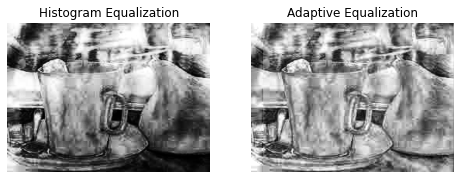

In [ ]:
adap_equalized = exposure.equalize_adapthist(faded, clip_limit= 0.02) # clip_limit must be between 0 and 1. Changes the contrast. 

comparison(hist_equalized, "Histogram Equalization", adap_equalized, "Adaptive Equalization")

The adaptive equalization results are more natural than the histogram equalization results.

# **Transformation**

### **Rotation**

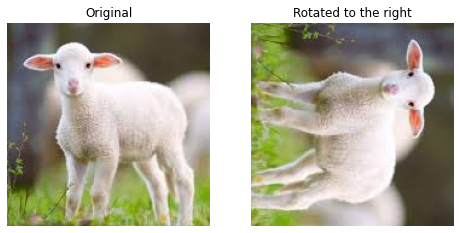

In [ ]:
sheep = plt.imread("rotate.jpg")

rotated = rotate(sheep, -90)

comparison(sheep, "Original", rotated, "Rotated to the right")

### **Rescaling**

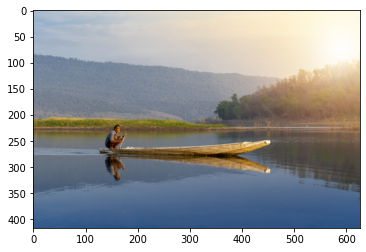

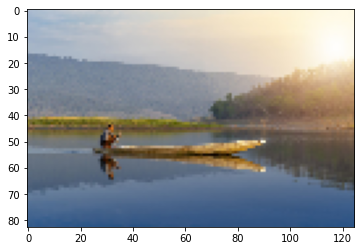

In [ ]:
boat = plt.imread("rescale.jpg")

rescaled = rescale(boat, 1/5, anti_aliasing= True, multichannel= True)

plt.imshow(boat)
plt.show()

plt.imshow(rescaled)
plt.show()


### **Resizing**

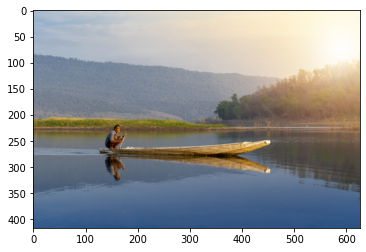

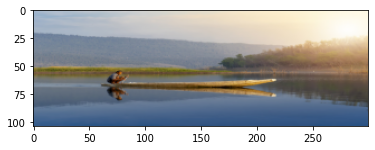

In [ ]:
height = int(boat.shape[0]/4)
weight = 300

resized = resize(boat, (height, weight), anti_aliasing= True)

plt.imshow(boat)
plt.show()

plt.imshow(resized)
plt.show()

# **Morphology**

### **Erosion**

In [67]:
global_jpg = plt.imread("global.jpg")
global_jpg = color.rgb2gray(global_jpg)

threshold_for_min = threshold_minimum(global_jpg)
binary_image = global_jpg > threshold_for_min


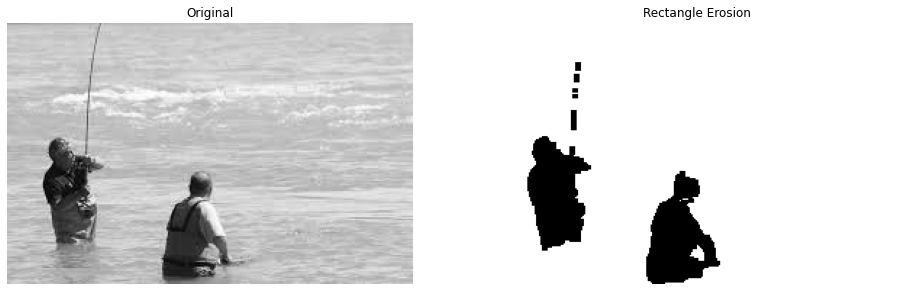

In [68]:
selem = morphology.rectangle(3,4)
erosion = morphology.binary_erosion(binary_image, selem = selem)
comparison(global_jpg, "Original", erosion, "Rectangle Erosion")

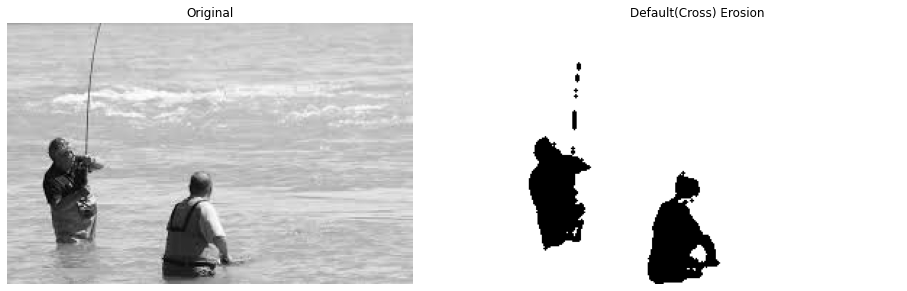

In [76]:
erosion = morphology.binary_erosion(binary_image)
comparison(global_jpg, "Original", erosion, "Default(Cross) Erosion")

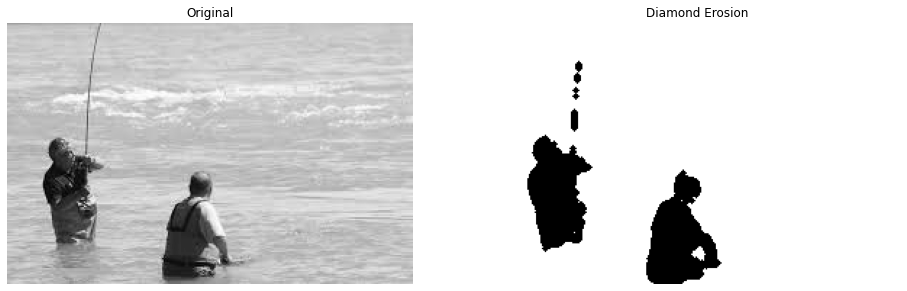

In [77]:
selem = morphology.diamond(2)
erosion = morphology.binary_erosion(binary_image, selem = selem)
comparison(global_jpg, "Original", erosion, "Diamond Erosion")